In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
path = 'sisfall_sample2.csv'

In [25]:
data = pd.read_csv(path)
data = data.drop('Unnamed: 0', axis =1 )
data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id
0,17,-179,-99,-18,-504,-352,76,-697,-279,D01,SA01
1,15,-174,-90,-53,-568,-306,48,-675,-254,D01,SA01
2,1,-176,-81,-84,-613,-271,-2,-668,-221,D01,SA01
3,-10,-180,-77,-104,-647,-227,-34,-697,-175,D01,SA01
4,-21,-191,-63,-128,-675,-191,-74,-741,-133,D01,SA01
...,...,...,...,...,...,...,...,...,...,...,...
2009995,74,-128,-162,192,73,377,307,-462,-726,D17,SE15
2009996,70,-130,-166,216,77,367,309,-489,-725,D17,SE15
2009997,71,-140,-166,246,75,363,305,-517,-727,D17,SE15
2009998,75,-146,-165,276,70,362,299,-536,-732,D17,SE15


<Axes: xlabel='activity', ylabel='count'>

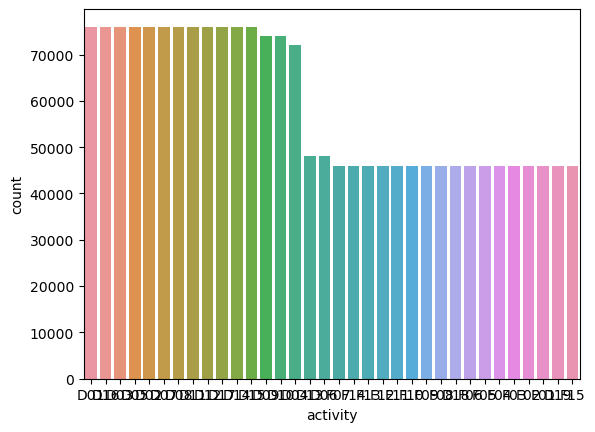

In [6]:
sns.countplot(x = "activity", data = data, order = data.activity.value_counts().index)

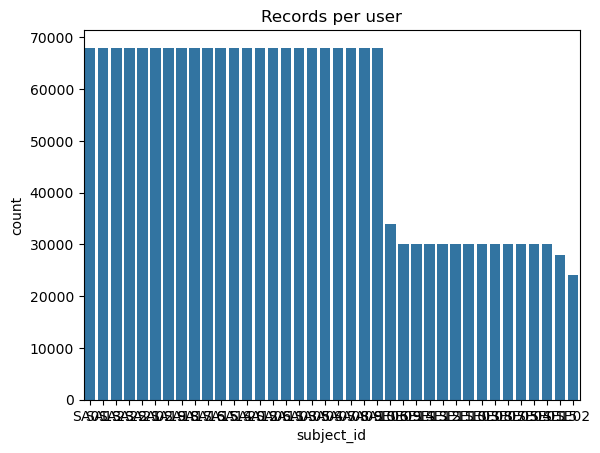

In [10]:
sns.countplot(x = "subject_id", data = data, palette = [sns.color_palette()[0]],
              order = data.subject_id.value_counts().index)
plt.title("Records per user");

In [14]:
Female = ['SA01', 'SA03','SA07','SA08','SA12','SA13','SA14','SA15','SA16','SA20','SA22', 'SA23'
         , 'SE02','SE03','SE04','SE08','SE10','SE11','SE15']
male = ['SA02','SA04','SA05','SA06','SA09','SA10','SA11','SA17','SA18','SA19','SA21',
        'SE01','SE05','SE06','SE07','SE09','SE12','SE13','SE14']

Fall = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10',
         'F11','F12','F13','F14','F15']

Non_Fall = SA_ADL = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','D10',
       'D11','D12','D13','D14','D15','D16','D17','D18','D19']

In [15]:
from sklearn import preprocessing

# Define column name of the label vector
LABEL = "activity"
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data[LABEL] = le.fit_transform(data["activity"].values.ravel())

In [13]:
data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id
0,17,-179,-99,-18,-504,-352,76,-697,-279,0,SA01
1,15,-174,-90,-53,-568,-306,48,-675,-254,0,SA01
2,1,-176,-81,-84,-613,-271,-2,-668,-221,0,SA01
3,-10,-180,-77,-104,-647,-227,-34,-697,-175,0,SA01
4,-21,-191,-63,-128,-675,-191,-74,-741,-133,0,SA01
...,...,...,...,...,...,...,...,...,...,...,...
2009995,74,-128,-162,192,73,377,307,-462,-726,16,SE15
2009996,70,-130,-166,216,77,367,309,-489,-725,16,SE15
2009997,71,-140,-166,246,75,363,305,-517,-727,16,SE15
2009998,75,-146,-165,276,70,362,299,-536,-732,16,SE15


In [27]:
data['sex'] = np.where(data['subject_id'].isin(Female), 'F', 'M')

In [28]:
data

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,17,-179,-99,-18,-504,-352,76,-697,-279,D01,SA01,F
1,15,-174,-90,-53,-568,-306,48,-675,-254,D01,SA01,F
2,1,-176,-81,-84,-613,-271,-2,-668,-221,D01,SA01,F
3,-10,-180,-77,-104,-647,-227,-34,-697,-175,D01,SA01,F
4,-21,-191,-63,-128,-675,-191,-74,-741,-133,D01,SA01,F
...,...,...,...,...,...,...,...,...,...,...,...,...
2009995,74,-128,-162,192,73,377,307,-462,-726,D17,SE15,F
2009996,70,-130,-166,216,77,367,309,-489,-725,D17,SE15,F
2009997,71,-140,-166,246,75,363,305,-517,-727,D17,SE15,F
2009998,75,-146,-165,276,70,362,299,-536,-732,D17,SE15,F


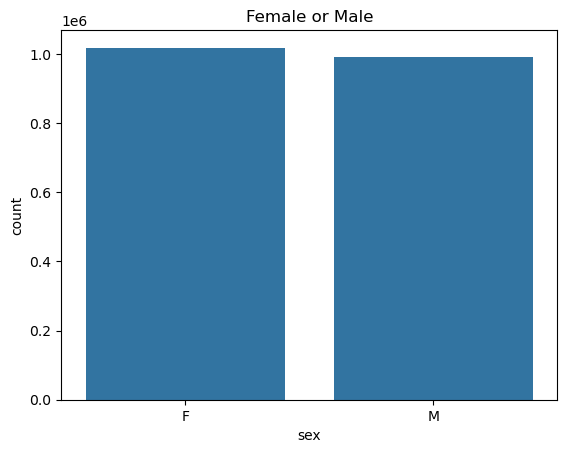

In [19]:
sns.countplot(x = "sex", data = data, palette = [sns.color_palette()[0]],
              order = data.sex.value_counts().index)
plt.title("Female or Male");

In [21]:
 data.sex.value_counts()

F    1018000
M     992000
Name: sex, dtype: int64

In [26]:
data['activity'].isin(Fall).value_counts()

False    1320000
True      690000
Name: activity, dtype: int64

In [29]:
columns = ['ADX_x_acc', 'ADX_y_acc', 'ADX_z_acc' ,
           'ITG_x_rot', 'ITG_y_rot','ITG_z_rot',
           'MMA_x_acc','MMA_y_acc','MMA_z_acc']

In [30]:
for column in columns:
        #data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
        data[column] = data[column] / data[column].max()
data.head()

,ADX_x_acc,ADX_y_acc,ADX_z_acc,ITG_x_rot,ITG_y_rot,ITG_z_rot,MMA_x_acc,MMA_y_acc,MMA_z_acc,activity,subject_id,sex
0,0.004152,-0.043744,-0.024199,-0.000549,-0.032084,-0.029620,0.009278,-0.085093,-0.034062,D01,SA01,F
1,0.003664,-0.042522,-0.022000,-0.001617,-0.036158,-0.025749,0.005860,-0.082408,-0.031010,D01,SA01,F
2,0.000244,-0.043011,-0.019800,-0.002564,-0.039022,-0.022804,-0.000244,-0.081553,-0.026981,D01,SA01,F
3,-0.002443,-0.043988,-0.018822,-0.003174,-0.041187,-0.019101,-0.004151,-0.085093,-0.021365,D01,SA01,F
4,-0.005129,-0.046676,-0.015400,-0.003906,-0.042969,-0.016072,-0.009034,-0.090465,-0.016237,D01,SA01,F
